<a href="https://colab.research.google.com/github/Faiz-Hibatullah/machine-learning-1103210172/blob/main/8.%20Week%208%20UTS/Klasifikasi_Models_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 1au6HqbGWpBCszFFBjZ4YmdpnqhThnTlU

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1au6HqbGWpBCszFFBjZ4YmdpnqhThnTlU
From (redirected): https://drive.google.com/uc?id=1au6HqbGWpBCszFFBjZ4YmdpnqhThnTlU&confirm=t&uuid=e9d563c1-778f-49c7-807f-8394c0c30cfc
To: /content/KlasifikasiUTS.csv
100% 151M/151M [00:01<00:00, 135MB/s]


In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif, chi2, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Set opsi tampilan
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
sns.set(style="whitegrid")

# 1. Pengumpulan dan Pembersihan Data

Dataset berhasil dimuat dengan ukuran: (284807, 31)

===== INFORMASI DATASET =====
Jumlah baris dan kolom: (284807, 31)

===== PREVIEW DATA =====
   Time        V1        V2        V3        V4        V5        V6        V7        V8        V9       V10       V11  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599  0.098698  0.363787  0.090794 -0.551600   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803  0.085102 -0.255425 -0.166974  1.612727   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461  0.247676 -1.514654  0.207643  0.624501   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609  0.377436 -1.387024 -0.054952 -0.226487   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941 -0.270533  0.817739  0.753074 -0.822843   

        V12       V13       V14       V15       V16       V17       V18       V19       V20       V21       V22  \
0 -0.617801 

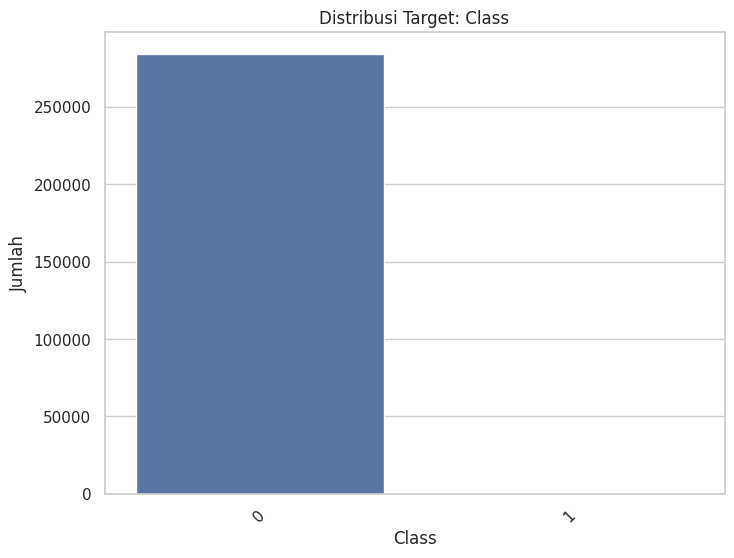

Kolom target: Class
Kolom numerik: 30
Kolom kategorikal: 0

===== PENANGANAN MISSING VALUES =====
Total missing values: 0 -> 0

===== PENANGANAN OUTLIER =====
Kolom 'V1': 7062 outlier ditangani dengan capping
Kolom 'V2': 13526 outlier ditangani dengan capping
Kolom 'V3': 3363 outlier ditangani dengan capping
Kolom 'V4': 11148 outlier ditangani dengan capping
Kolom 'V5': 12295 outlier ditangani dengan capping
Kolom 'V6': 22965 outlier ditangani dengan capping
Kolom 'V7': 8948 outlier ditangani dengan capping
Kolom 'V8': 24134 outlier ditangani dengan capping
Kolom 'V9': 8283 outlier ditangani dengan capping
Kolom 'V10': 9496 outlier ditangani dengan capping
Kolom 'V11': 780 outlier ditangani dengan capping
Kolom 'V12': 15348 outlier ditangani dengan capping
Kolom 'V13': 3368 outlier ditangani dengan capping
Kolom 'V14': 14149 outlier ditangani dengan capping
Kolom 'V15': 2894 outlier ditangani dengan capping
Kolom 'V16': 8184 outlier ditangani dengan capping
Kolom 'V17': 7420 outlier di

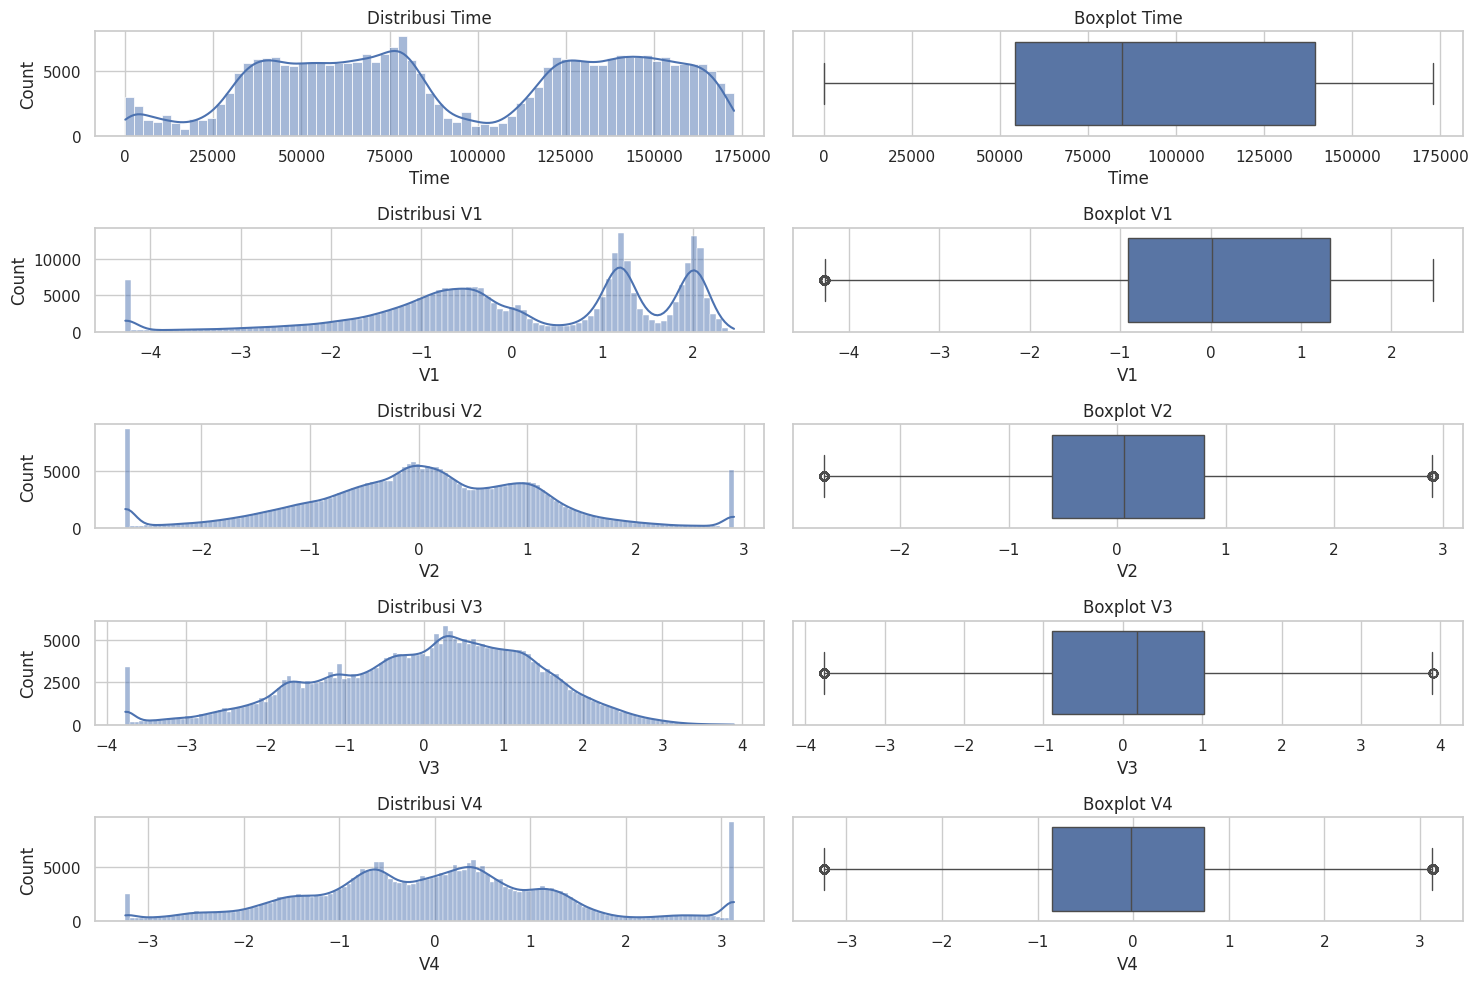

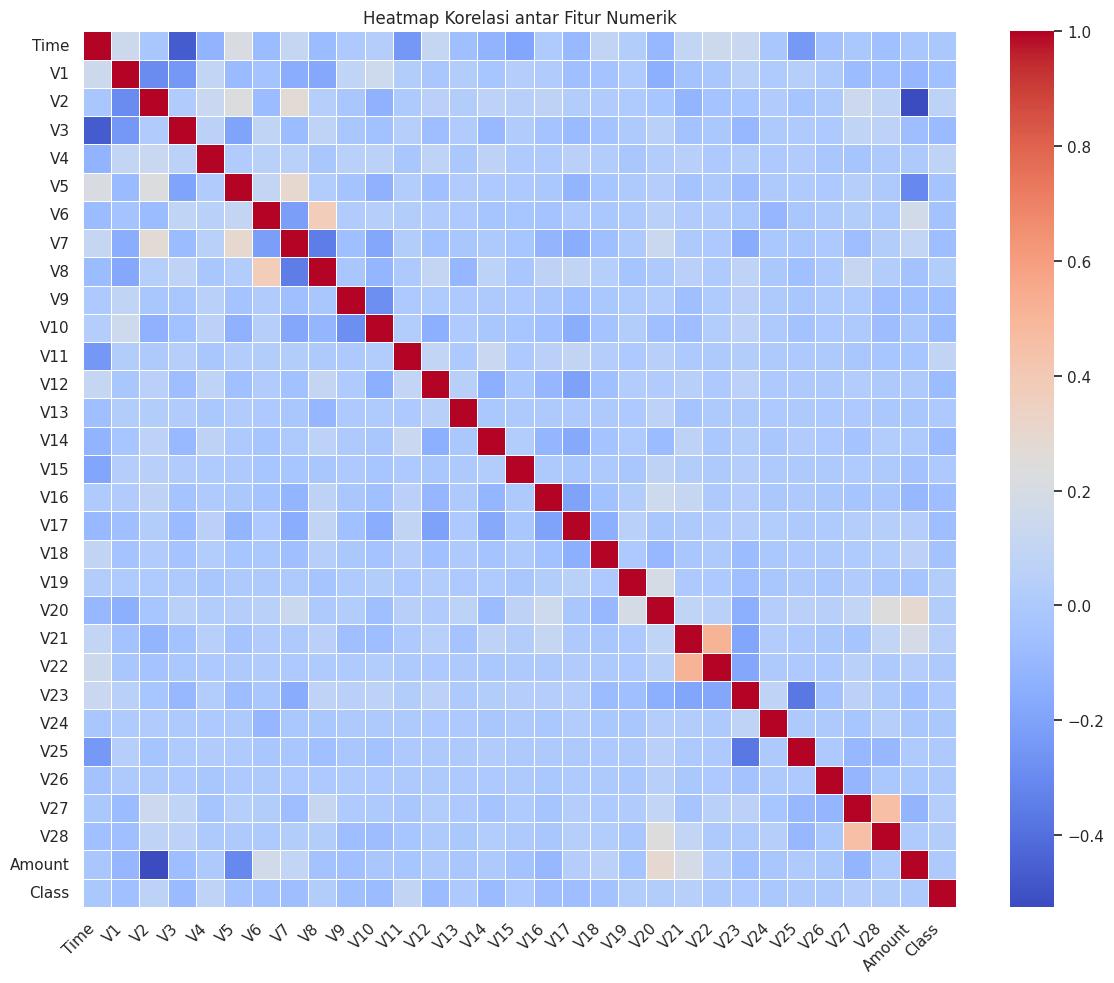

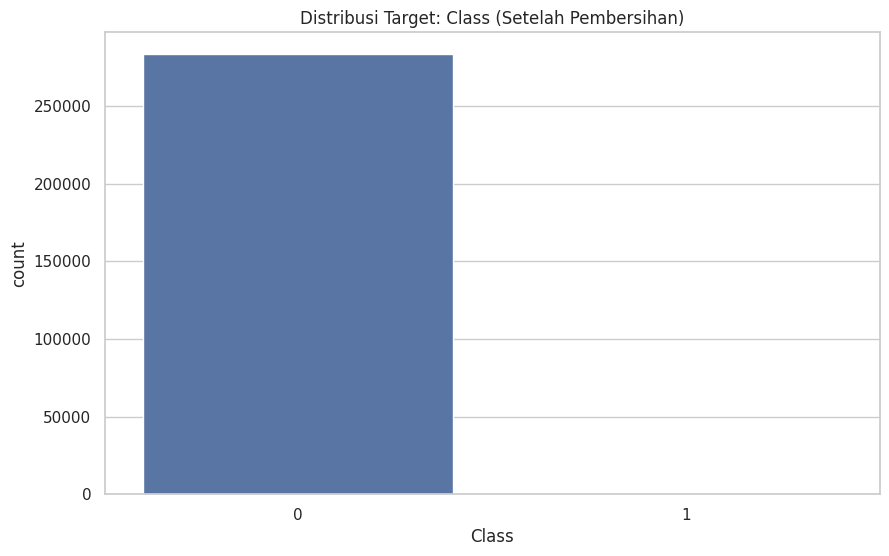

In [ ]:
# Fungsi untuk membaca dataset
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Dataset berhasil dimuat dengan ukuran: {df.shape}")
        return df
    except Exception as e:
        print(f"Error saat memuat dataset: {e}")
        return None

# Load dataset
# Ganti path sesuai dengan lokasi file setelah download
file_path = 'KlasifikasiUTS.csv'  # Sesuaikan dengan nama file setelah download
df = load_data(file_path)

# 1.2 Eksplorasi Data Awal
def explore_data(df):
    """
    Melakukan eksplorasi awal pada dataset.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame yang akan dieksplorasi
    """
    print("\n===== INFORMASI DATASET =====")
    print(f"Jumlah baris dan kolom: {df.shape}")
    print("\n===== PREVIEW DATA =====")
    print(df.head())
    print("\n===== INFORMASI DATA =====")
    print(df.info())
    print("\n===== STATISTIK DESKRIPTIF =====")
    print(df.describe())
    print("\n===== JUMLAH NILAI NULL =====")
    print(df.isnull().sum())
    print("\n===== JUMLAH NILAI DUPLIKAT =====")
    print(f"Jumlah baris duplikat: {df.duplicated().sum()}")

    # Deteksi target variable
    if 'target' in df.columns:
        target_col = 'target'
    else:
        # Asumsikan kolom terakhir adalah target jika tidak ada kolom 'target'
        target_col = df.columns[-1]

    print(f"\n===== DISTRIBUSI TARGET ({target_col}) =====")
    if df[target_col].dtype == 'object' or df[target_col].nunique() < 10:
        print(df[target_col].value_counts(normalize=True) * 100)
        plt.figure(figsize=(8, 6))
        sns.countplot(x=target_col, data=df)
        plt.title(f"Distribusi Target: {target_col}")
        plt.ylabel("Jumlah")
        plt.xticks(rotation=45)
        plt.show()
    else:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[target_col], kde=True)
        plt.title(f"Distribusi Target: {target_col}")
        plt.show()

# Jalankan eksplorasi data
explore_data(df)

# 1.3 Pembersihan Data
def clean_data(df, target_column=None):
    # Membuat salinan DataFrame untuk menghindari modifikasi data asli
    df_clean = df.copy()

    # Identifikasi kolom target jika tidak ditentukan
    if target_column is None:
        if 'target' in df_clean.columns:
            target_column = 'target'
        else:
            # Asumsikan kolom terakhir adalah target
            target_column = df_clean.columns[-1]

    print(f"Kolom target: {target_column}")

    # Pisahkan fitur dan target
    X = df_clean.drop(columns=[target_column])
    y = df_clean[target_column]

    # Identifikasi tipe kolom
    numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

    print(f"Kolom numerik: {len(numeric_cols)}")
    print(f"Kolom kategorikal: {len(categorical_cols)}")

    # 1. Menangani nilai yang hilang (missing values)
    print("\n===== PENANGANAN MISSING VALUES =====")
    missing_before = df_clean.isnull().sum().sum()

    # Tangani missing values pada kolom numerik (dengan median)
    if numeric_cols:
        for col in numeric_cols:
            if df_clean[col].isnull().sum() > 0:
                median_val = df_clean[col].median()
                df_clean[col].fillna(median_val, inplace=True)
                print(f"Kolom '{col}': {df_clean[col].isnull().sum()} nilai missing diisi dengan median: {median_val}")

    # Tangani missing values pada kolom kategorikal (dengan mode)
    if categorical_cols:
        for col in categorical_cols:
            if df_clean[col].isnull().sum() > 0:
                mode_val = df_clean[col].mode()[0]
                df_clean[col].fillna(mode_val, inplace=True)
                print(f"Kolom '{col}': {df_clean[col].isnull().sum()} nilai missing diisi dengan mode: {mode_val}")

    missing_after = df_clean.isnull().sum().sum()
    print(f"Total missing values: {missing_before} -> {missing_after}")

    # 2. Menangani outlier pada kolom numerik dengan metode IQR
    print("\n===== PENANGANAN OUTLIER =====")
    rows_before = df_clean.shape[0]

    for col in numeric_cols:
        # Hitung Q1, Q3, dan IQR
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        # Tetapkan batas untuk outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identifikasi dan tangani outlier (metode capping)
        outliers = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()

        if outliers > 0:
            # Gunakan metode capping untuk membatasi nilai outlier
            df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)
            print(f"Kolom '{col}': {outliers} outlier ditangani dengan capping")

    rows_after = df_clean.shape[0]
    print(f"Jumlah baris setelah penanganan outlier: {rows_before} -> {rows_after}")

    # 3. Menangani duplikasi
    print("\n===== PENANGANAN DUPLIKASI =====")
    duplicates = df_clean.duplicated().sum()

    if duplicates > 0:
        df_clean = df_clean.drop_duplicates()
        print(f"Jumlah baris duplikat yang dihapus: {duplicates}")
        print(f"Jumlah baris setelah penghapusan duplikat: {df_clean.shape[0]}")
    else:
        print("Tidak ditemukan baris duplikat")

    # Tampilkan ringkasan hasil pembersihan
    print("\n===== RINGKASAN PEMBERSIHAN DATA =====")
    print(f"Jumlah baris awal: {df.shape[0]}")
    print(f"Jumlah baris akhir: {df_clean.shape[0]}")
    print(f"Jumlah kolom: {df_clean.shape[1]}")

    return df_clean, target_column

# Jalankan pembersihan data
df_clean, target_column = clean_data(df)

# Visualisasi data setelah pembersihan
def visualize_cleaned_data(df, target_column):
    # Pilih beberapa fitur numerik untuk visualisasi (max 5)
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    if target_column in numeric_cols:
        numeric_cols.remove(target_column)

    sample_numeric = numeric_cols[:min(5, len(numeric_cols))]

    # Visualisasi distribusi untuk kolom numerik
    if sample_numeric:
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(sample_numeric, 1):
            plt.subplot(len(sample_numeric), 2, 2*i-1)
            sns.histplot(df[col], kde=True)
            plt.title(f'Distribusi {col}')

            plt.subplot(len(sample_numeric), 2, 2*i)
            sns.boxplot(x=df[col])
            plt.title(f'Boxplot {col}')

        plt.tight_layout()
        plt.show()

    # Visualisasi korelasi antar fitur
    numeric_df = df.select_dtypes(include=['number'])
    plt.figure(figsize=(12, 10))
    sns.heatmap(numeric_df.corr(), cmap='coolwarm', linewidths=0.5, fmt='.2f')
    plt.title('Heatmap Korelasi antar Fitur Numerik')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Visualisasi distribusi target
    plt.figure(figsize=(10, 6))
    if df[target_column].dtype == 'object' or df[target_column].nunique() < 10:
        sns.countplot(x=target_column, data=df)
        plt.title(f"Distribusi Target: {target_column} (Setelah Pembersihan)")
    else:
        sns.histplot(df[target_column], kde=True)
        plt.title(f"Distribusi Target: {target_column} (Setelah Pembersihan)")
    plt.show()

# Visualisasi data yang telah dibersihkan
visualize_cleaned_data(df_clean, target_column)

# 2. FEATURE SELECTION


===== FEATURE SELECTION =====
Jumlah fitur awal: 30

1. Menghapus fitur dengan nilai konstan atau hampir konstan:
Tidak ada fitur dengan variansi rendah

2. Deteksi dan penghapusan fitur duplikat:
Tidak ada fitur duplikat yang terdeteksi

3. Seleksi fitur berdasarkan metode statistik:

A. Menggunakan Mutual Information untuk fitur numerik:
   Feature  MI Score
17     V17  0.007094
11     V11  0.005932
10     V10  0.005451
14     V14  0.004584
3       V3  0.004075
12     V12  0.003819
29  Amount  0.003639
16     V16  0.003566
4       V4  0.003450
7       V7  0.003231
2       V2  0.002880
27     V27  0.002857
6       V6  0.002855
9       V9  0.002811
28     V28  0.002312
18     V18  0.002306
21     V21  0.002132
5       V5  0.001917
20     V20  0.001772
1       V1  0.001732
8       V8  0.001683
0     Time  0.001335
19     V19  0.001125
23     V23  0.000887
24     V24  0.000415
26     V26  0.000290
25     V25  0.000281
22     V22  0.000141
13     V13  0.000093
15     V15  0.000030


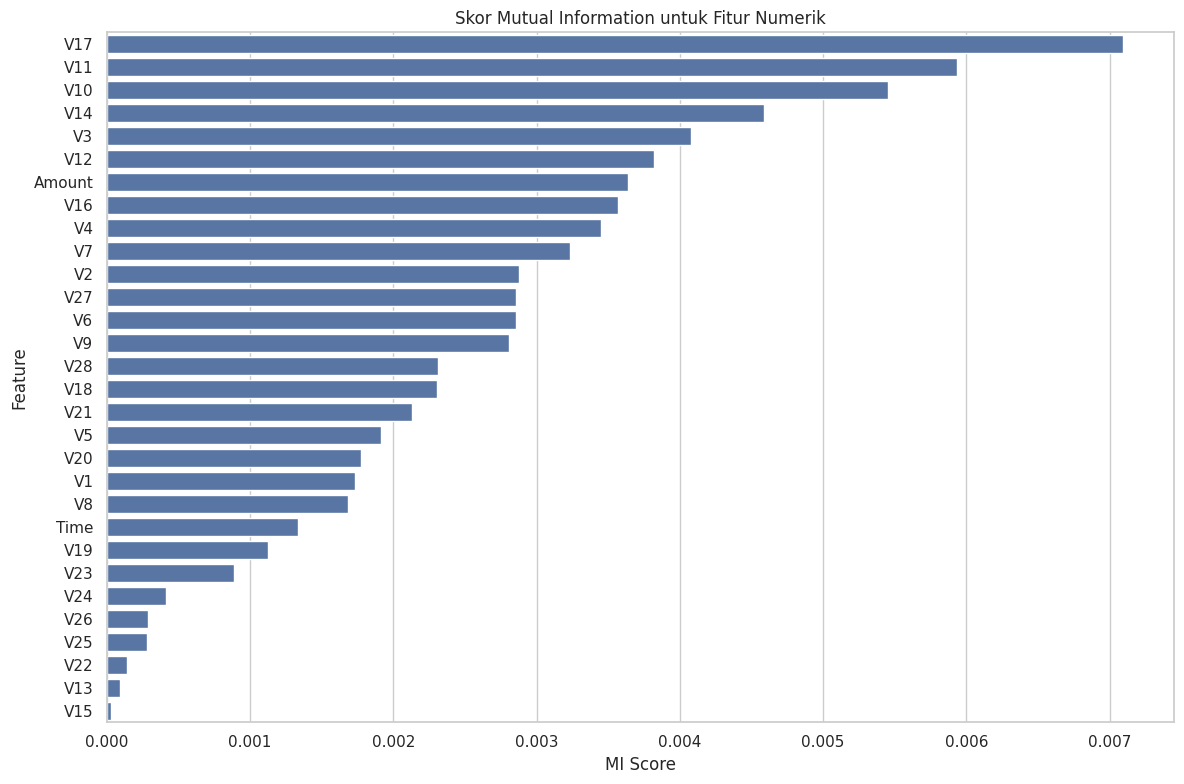

Fitur numerik dengan skor MI signifikan: []

C. Menggunakan ANOVA F-value untuk fitur numerik:
   Feature      F Score
11     V11  2521.750813
3       V3  2131.523397
14     V14  2046.062793
12     V12  1904.961340
4       V4  1891.880033
10     V10  1856.586037
7       V7  1356.171778
16     V16  1329.067754
17     V17  1309.730450
2       V2  1222.035293
9       V9  1106.784680
1       V1   876.675753
18     V18   618.261704
21     V21   608.293507
6       V6   601.238638
5       V5   424.264930
27     V27   288.706564
8       V8   213.188241
19     V19   200.689471
20     V20   193.764468
28     V28   159.069136
0     Time    43.346393
24     V24    15.349160
23     V23     6.502897
29  Amount     6.105786
25     V25     6.003647
26     V26     5.046670
13     V13     4.110628
15     V15     2.349079
22     V22     2.093045


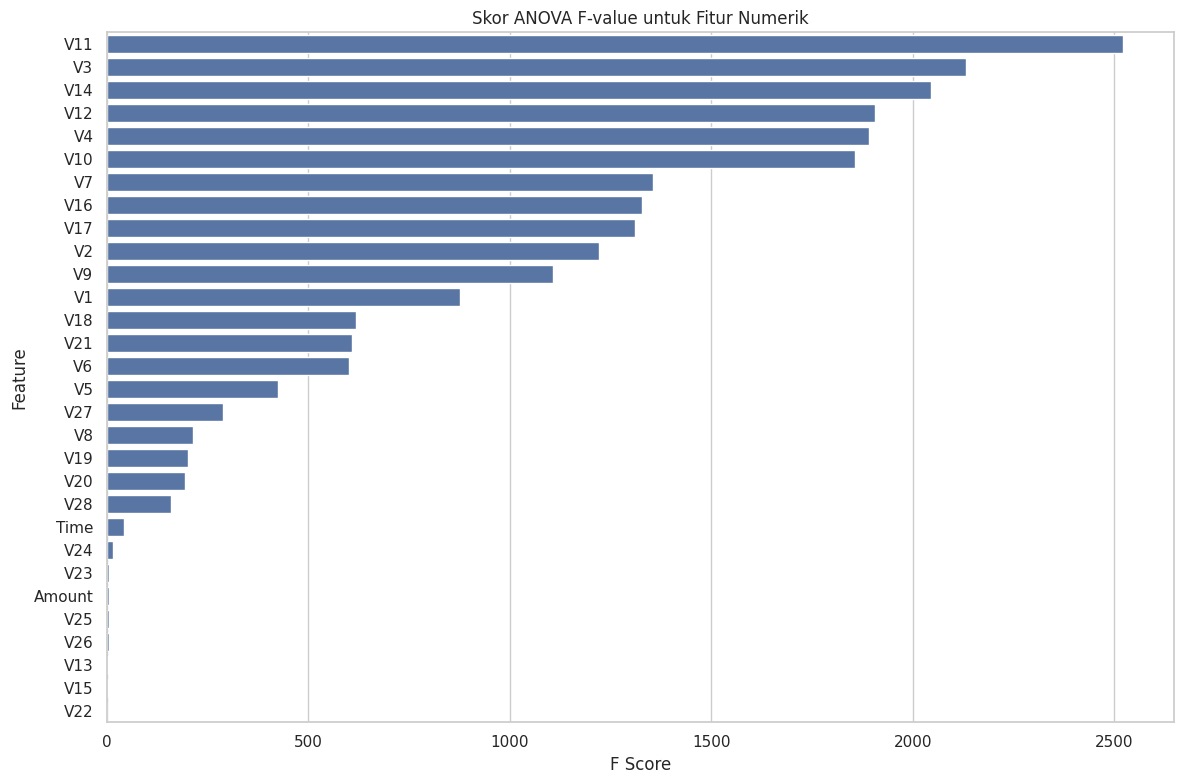


Tidak ada fitur yang terpilih dengan metode seleksi fitur. Menggunakan semua fitur.

Jumlah fitur awal: 30
Jumlah fitur setelah seleksi: 30
Fitur yang dipilih: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [ ]:
def select_features(df, target_column):
    # Membuat salinan DataFrame
    df_select = df.copy()

    # Pisahkan fitur dan target
    X = df_select.drop(columns=[target_column])
    y = df_select[target_column]

    # Identifikasi tipe kolom
    numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

    print("\n===== FEATURE SELECTION =====")
    initial_features = X.shape[1]
    print(f"Jumlah fitur awal: {initial_features}")

    # 2.1 Penghapusan fitur dengan nilai konstan atau hampir konstan
    print("\n1. Menghapus fitur dengan nilai konstan atau hampir konstan:")

    var_thresh = VarianceThreshold(threshold=0.01)  # Tetapkan threshold yang sesuai

    # Hanya terapkan pada fitur numerik
    if numeric_cols:
        # Simpan nama kolom sebelum transformasi
        X_numeric = X[numeric_cols]
        var_thresh.fit(X_numeric)

        # Dapatkan fitur dengan variansi di atas threshold
        mask = var_thresh.get_support()
        constant_cols = [col for col, keep in zip(numeric_cols, ~mask) if keep]
        low_var_cols = [col for col, keep in zip(numeric_cols, ~mask) if keep]

        if low_var_cols:
            print(f"Fitur yang dihapus karena variansi rendah: {low_var_cols}")
            # Hapus kolom dengan variansi rendah
            X = X.drop(columns=low_var_cols)
        else:
            print("Tidak ada fitur dengan variansi rendah")

    # Update daftar kolom setelah penghapusan fitur variansi rendah
    numeric_cols = [col for col in numeric_cols if col in X.columns]

    # 2.2 Deteksi dan penghapusan fitur duplikat
    print("\n2. Deteksi dan penghapusan fitur duplikat:")

    # Untuk fitur numerik, periksa korelasi yang sangat tinggi
    duplicate_features = []
    if len(numeric_cols) > 1:
        # Hitung matriks korelasi
        corr_matrix = X[numeric_cols].corr().abs()

        # Dapatkan fitur duplikat berdasarkan korelasi tinggi (>0.95)
        upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        duplicate_pairs = [(i, j) for i, j in zip(*np.where(upper_tri > 0.95))]

        if duplicate_pairs:
            # Simpan fitur yang berkorelasi tinggi sebagai kandidat duplikat
            for i, j in duplicate_pairs:
                col_i, col_j = numeric_cols[i], numeric_cols[j]
                print(f"Fitur berkorelasi tinggi: '{col_i}' dan '{col_j}' (korelasi: {corr_matrix.iloc[i, j]:.2f})")
                # Sebagai simplifikasi, kita hapus kolom kedua dari setiap pasangan
                if col_j not in duplicate_features:
                    duplicate_features.append(col_j)

    # Hapus fitur duplikat
    if duplicate_features:
        print(f"Fitur yang dihapus karena duplikasi: {duplicate_features}")
        X = X.drop(columns=duplicate_features)
    else:
        print("Tidak ada fitur duplikat yang terdeteksi")

    # Update daftar kolom setelah penghapusan fitur duplikat
    numeric_cols = [col for col in numeric_cols if col in X.columns]

    # 2.3 Seleksi fitur berdasarkan korelasi dengan target (untuk fitur numerik)
    print("\n3. Seleksi fitur berdasarkan metode statistik:")

    # Persiapkan target variabel
    le = LabelEncoder()
    if y.dtype == 'object' or y.dtype == 'category':
        y_encoded = le.fit_transform(y)
    else:
        y_encoded = y.copy()

    selected_features = []

    # A. Mutual Information untuk klasifikasi
    if len(numeric_cols) > 0:
        print("\nA. Menggunakan Mutual Information untuk fitur numerik:")
        try:
            mi_selector = SelectKBest(mutual_info_classif, k='all')
            mi_selector.fit(X[numeric_cols], y_encoded)

            # Dapatkan skor untuk setiap fitur
            mi_scores = pd.DataFrame(
                {'Feature': numeric_cols,
                 'MI Score': mi_selector.scores_}
            ).sort_values('MI Score', ascending=False)

            print(mi_scores)

            # Visualisasi skor MI
            plt.figure(figsize=(12, 8))
            sns.barplot(x='MI Score', y='Feature', data=mi_scores)
            plt.title('Skor Mutual Information untuk Fitur Numerik')
            plt.tight_layout()
            plt.show()

            # Pilih fitur dengan skor MI yang signifikan (misalnya > 0.01)
            significant_mi_features = mi_scores[mi_scores['MI Score'] > 0.01]['Feature'].tolist()
            print(f"Fitur numerik dengan skor MI signifikan: {significant_mi_features}")
            selected_features.extend(significant_mi_features)
        except Exception as e:
            print(f"Error saat menghitung Mutual Information: {e}")
            # Jika terjadi error, gunakan semua fitur numerik
            selected_features.extend(numeric_cols)

    # B. Chi-Square Test untuk fitur kategorikal
    if len(categorical_cols) > 0:
        print("\nB. Menggunakan Chi-Square Test untuk fitur kategorikal:")
        try:
            # Encode fitur kategorikal terlebih dahulu
            X_cat_encoded = pd.get_dummies(X[categorical_cols], drop_first=True)

            # Pastikan tidak ada nilai negatif (chi2 memerlukan nilai non-negatif)
            if (X_cat_encoded < 0).any().any():
                print("Warning: Terdapat nilai negatif pada fitur kategorikal yang di-encode")
                # Jika terdapat nilai negatif, gunakan semua fitur kategorikal
                selected_features.extend(categorical_cols)
            else:
                chi2_selector = SelectKBest(chi2, k='all')
                chi2_selector.fit(X_cat_encoded, y_encoded)

                # Dapatkan skor untuk setiap fitur yang di-encode
                chi2_scores = pd.DataFrame(
                    {'Feature': X_cat_encoded.columns,
                     'Chi2 Score': chi2_selector.scores_}
                ).sort_values('Chi2 Score', ascending=False)

                print(chi2_scores.head(10))  # Tampilkan 10 teratas saja jika terlalu banyak

                # Visualisasi skor Chi2 (hanya 10 teratas jika terlalu banyak)
                plt.figure(figsize=(12, 8))
                top_chi2 = chi2_scores.head(min(10, len(chi2_scores)))
                sns.barplot(x='Chi2 Score', y='Feature', data=top_chi2)
                plt.title('Skor Chi-Square untuk Fitur Kategorikal (10 Teratas)')
                plt.tight_layout()
                plt.show()

                # Petakan kembali fitur asli (ini hanya approksimasi sederhana)
                # Dalam kasus sebenarnya, kita perlu melacak fitur asli dengan lebih baik
                original_cat_features = []
                for col in categorical_cols:
                    for feat in X_cat_encoded.columns:
                        if feat.startswith(col + '_'):
                            if col not in original_cat_features:
                                original_cat_features.append(col)

                print(f"Fitur kategorikal yang terpilih: {original_cat_features}")
                selected_features.extend(original_cat_features)
        except Exception as e:
            print(f"Error saat menghitung Chi-Square: {e}")
            # Jika terjadi error, gunakan semua fitur kategorikal
            selected_features.extend(categorical_cols)

    # C. ANOVA F-value untuk fitur numerik (alternatif)
    if len(numeric_cols) > 0:
        print("\nC. Menggunakan ANOVA F-value untuk fitur numerik:")
        try:
            f_selector = SelectKBest(f_classif, k='all')
            f_selector.fit(X[numeric_cols], y_encoded)

            # Dapatkan skor untuk setiap fitur
            f_scores = pd.DataFrame(
                {'Feature': numeric_cols,
                 'F Score': f_selector.scores_}
            ).sort_values('F Score', ascending=False)

            print(f_scores)

            # Visualisasi skor F
            plt.figure(figsize=(12, 8))
            sns.barplot(x='F Score', y='Feature', data=f_scores)
            plt.title('Skor ANOVA F-value untuk Fitur Numerik')
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error saat menghitung ANOVA F-value: {e}")

    # Finalisasi fitur terpilih (hilangkan duplikat)
    selected_features = list(set(selected_features))

    # Jika tidak ada fitur yang terpilih, gunakan semua fitur
    if not selected_features:
        print("\nTidak ada fitur yang terpilih dengan metode seleksi fitur. Menggunakan semua fitur.")
        selected_features = X.columns.tolist()

    # Pilih hanya fitur yang terpilih
    X_selected = X[selected_features]

    print(f"\nJumlah fitur awal: {initial_features}")
    print(f"Jumlah fitur setelah seleksi: {X_selected.shape[1]}")
    print(f"Fitur yang dipilih: {selected_features}")

    # Pisahkan kembali fitur numerik dan kategorikal setelah seleksi
    numeric_cols_selected = [col for col in numeric_cols if col in selected_features]
    categorical_cols_selected = [col for col in categorical_cols if col in selected_features]

    return X_selected, y, numeric_cols_selected, categorical_cols_selected

# Jalankan feature selection
X_selected, y, numeric_cols, categorical_cols = select_features(df_clean, target_column)


#3. Feature Engineering

In [ ]:
def engineer_features(X, y, numeric_cols, categorical_cols):
    print("\n===== FEATURE ENGINEERING =====")

    # Split data menjadi train dan test set
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y if y.nunique() < 10 else None
    )

    print(f"Ukuran data training: {X_train.shape}")
    print(f"Ukuran data testing: {X_test.shape}")

    # Buat transformer untuk fitur numerik dan kategorikal
    # 1. Preprocessor untuk fitur numerik (normalisasi/scaling)
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # 2. Preprocessor untuk fitur kategorikal (one-hot encoding)
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    # Kombinasikan transformers dalam satu preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols),
            ('cat', categorical_transformer, categorical_cols)
        ]
    )

    # Cetak informasi transformasi
    print("\n1. Transformasi Data:")
    print(f"Fitur numerik akan diproses dengan: imputer (median) + StandardScaler")
    print(f"Fitur kategorikal akan diproses dengan: imputer (most_frequent) + OneHotEncoder")

    # Terapkan preprocessor pada data training
    print("\n2. Penerapan Transformasi pada Data Training:")
    X_train_transformed = preprocessor.fit_transform(X_train)

    # Terapkan preprocessor pada data testing
    X_test_transformed = preprocessor.transform(X_test)

    # Tampilkan informasi hasil transformasi
    print(f"Dimensi data training setelah transformasi: {X_train_transformed.shape}")
    print(f"Dimensi data testing setelah transformasi: {X_test_transformed.shape}")

    # Jika fitur kategorikal ada, cetak informasi fitur hasil one-hot encoding
    if categorical_cols:
        # Dapatkan nama fitur setelah one-hot encoding
        cat_cols_transformed = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
        print(f"\nJumlah fitur setelah one-hot encoding: {len(cat_cols_transformed)}")
        print(f"Contoh fitur hasil one-hot encoding: {cat_cols_transformed[:5]}..." if len(cat_cols_transformed) > 5 else cat_cols_transformed)

    return X_train, X_test, y_train, y_test, preprocessor, X_train_transformed, X_test_transformed

# Jalankan feature engineering
X_train, X_test, y_train, y_test, preprocessor, X_train_transformed, X_test_transformed = engineer_features(X_selected, y, numeric_cols, categorical_cols)



===== FEATURE ENGINEERING =====
Ukuran data training: (226980, 30)
Ukuran data testing: (56746, 30)

1. Transformasi Data:
Fitur numerik akan diproses dengan: imputer (median) + StandardScaler
Fitur kategorikal akan diproses dengan: imputer (most_frequent) + OneHotEncoder

2. Penerapan Transformasi pada Data Training:
Dimensi data training setelah transformasi: (226980, 30)
Dimensi data testing setelah transformasi: (56746, 30)


#4. Pembuatan Model


===== PEMBUATAN DAN EVALUASI MODEL =====

--------- Model: Logistic Regression ---------
Melatih model...
Accuracy: 0.9994
Precision: 0.9994
Recall: 0.9994
F1 Score: 0.9994


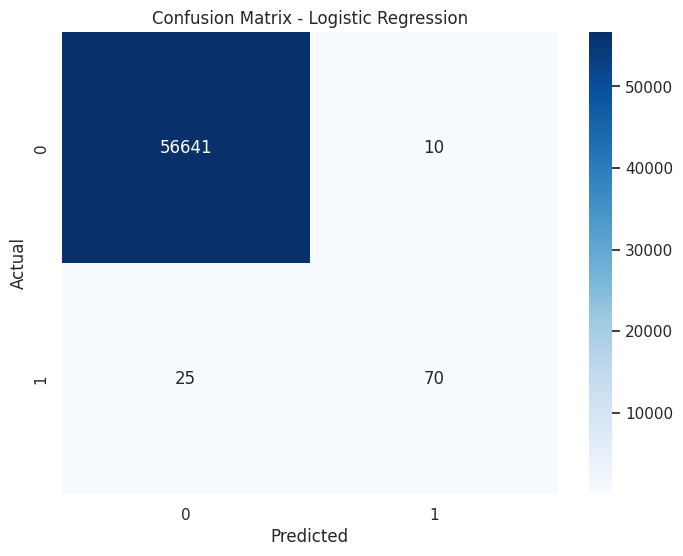


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.88      0.74      0.80        95

    accuracy                           1.00     56746
   macro avg       0.94      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746



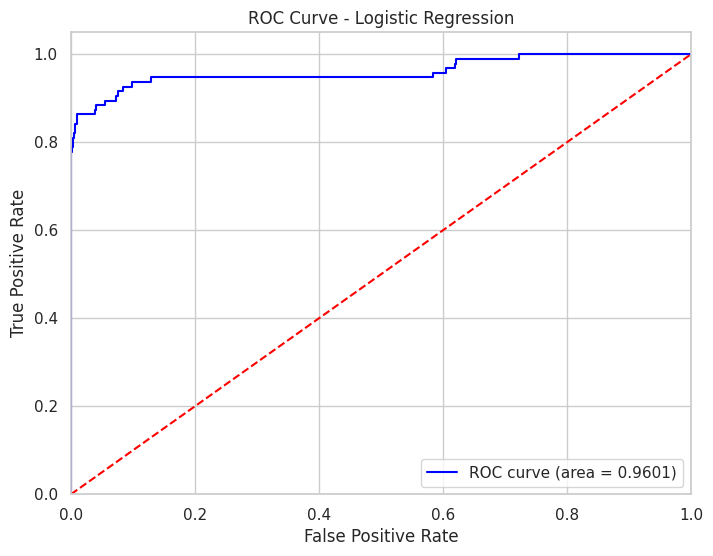

AUC: 0.9601

--------- Model: Decision Tree ---------
Melatih model...
Accuracy: 0.9992
Precision: 0.9992
Recall: 0.9992
F1 Score: 0.9992


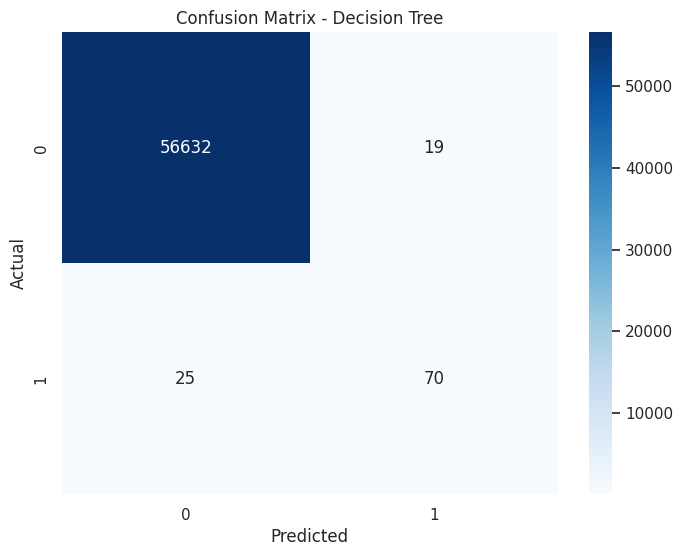


Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.79      0.74      0.76        95

    accuracy                           1.00     56746
   macro avg       0.89      0.87      0.88     56746
weighted avg       1.00      1.00      1.00     56746



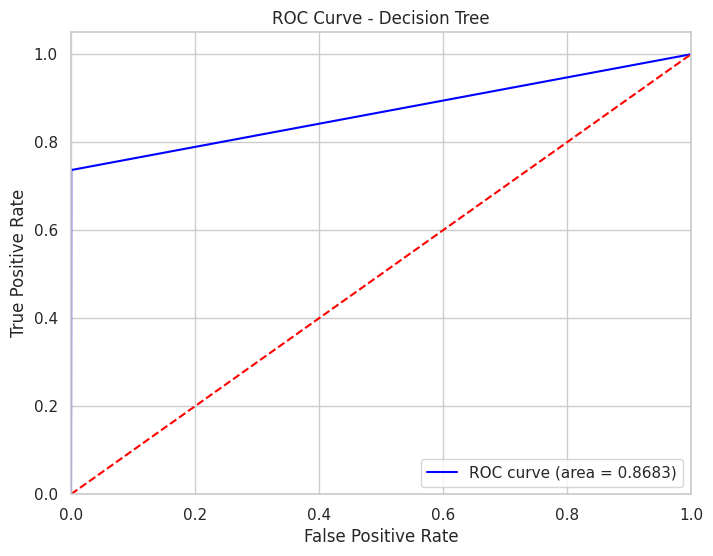

AUC: 0.8683

--------- Model: KNeighbors ---------
Melatih model...
Accuracy: 0.9995
Precision: 0.9994
Recall: 0.9995
F1 Score: 0.9994


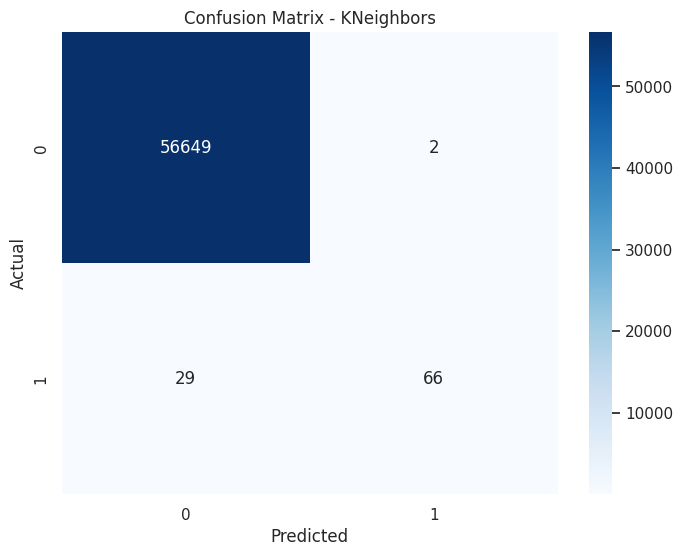


Classification Report - KNeighbors:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.69      0.81        95

    accuracy                           1.00     56746
   macro avg       0.99      0.85      0.90     56746
weighted avg       1.00      1.00      1.00     56746



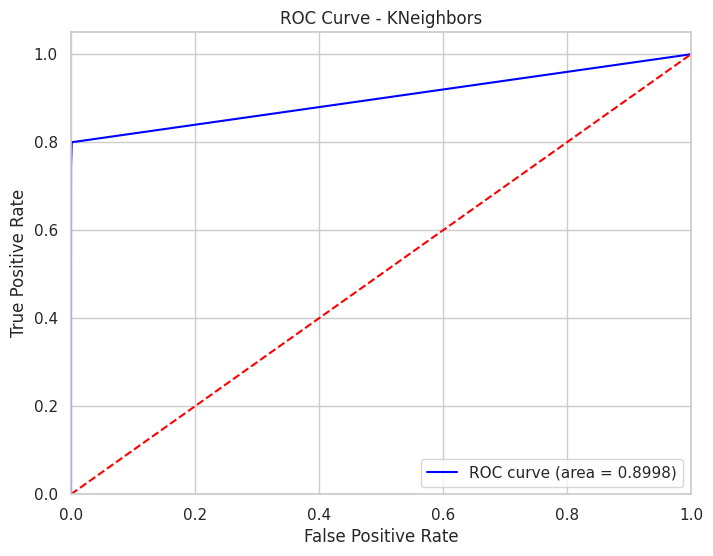

AUC: 0.8998

--------- Model: Random Forest ---------
Melatih model...
Accuracy: 0.9995
Precision: 0.9995
Recall: 0.9995
F1 Score: 0.9995


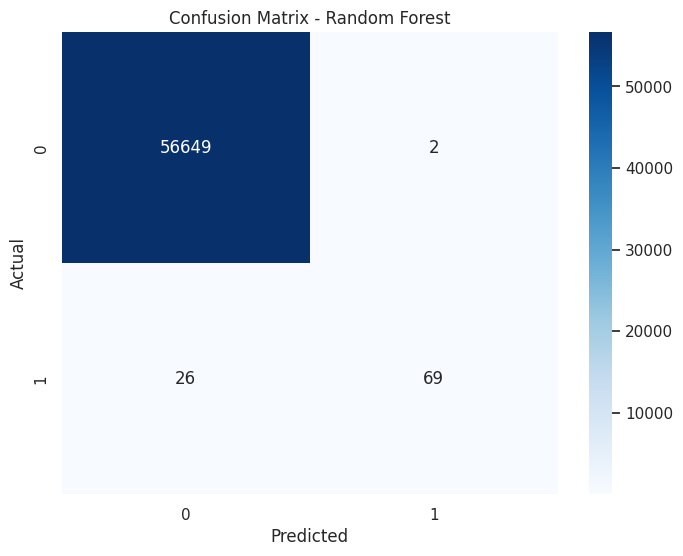


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.73      0.83        95

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.92     56746
weighted avg       1.00      1.00      1.00     56746



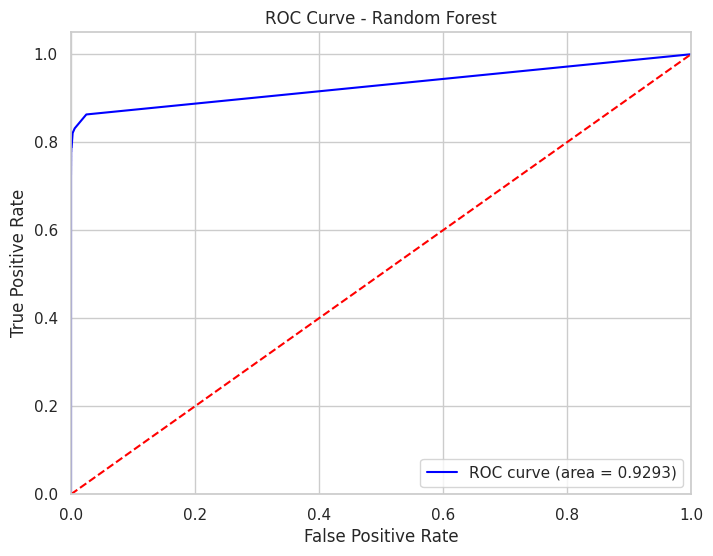

AUC: 0.9293

--------- Model: Gradient Boosting ---------
Melatih model...
Accuracy: 0.9993
Precision: 0.9992
Recall: 0.9993
F1 Score: 0.9993


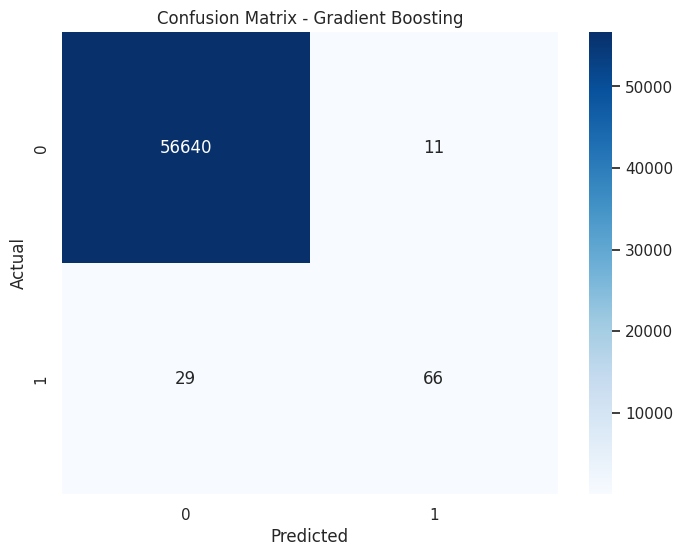


Classification Report - Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.86      0.69      0.77        95

    accuracy                           1.00     56746
   macro avg       0.93      0.85      0.88     56746
weighted avg       1.00      1.00      1.00     56746



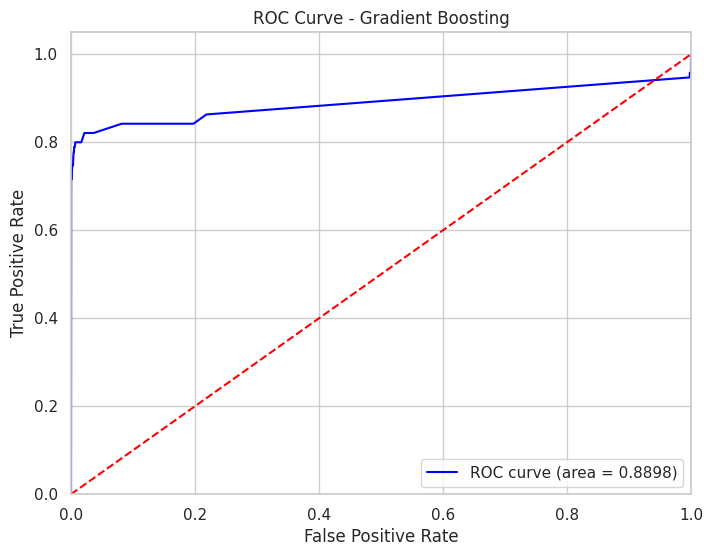

AUC: 0.8898

--------- Model: SVM ---------
Melatih model...
Accuracy: 0.9995
Precision: 0.9995
Recall: 0.9995
F1 Score: 0.9994


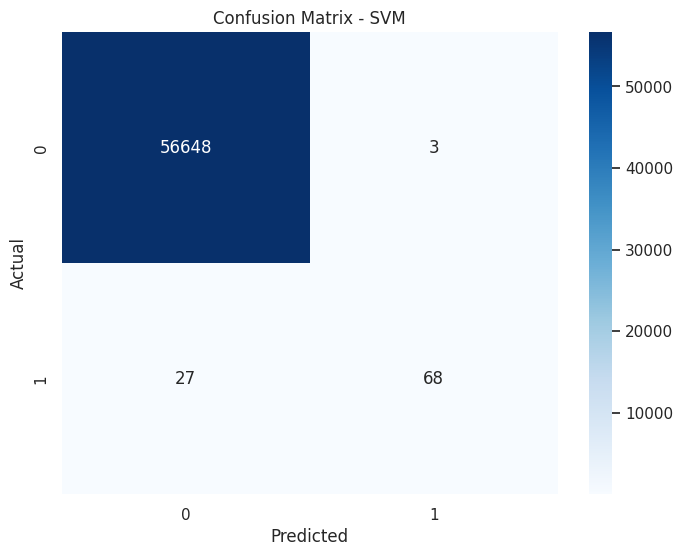


Classification Report - SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.72      0.82        95

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



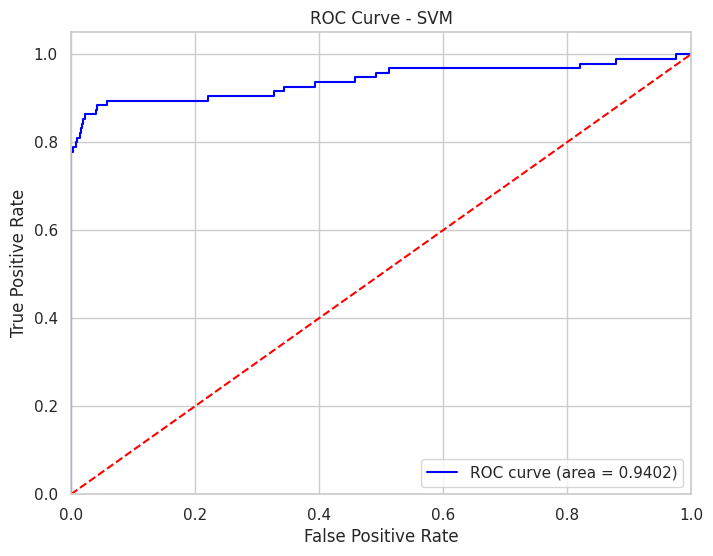

AUC: 0.9402

===== PERBANDINGAN PERFORMA MODEL =====
                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0        Random Forest  0.999507   0.999495  0.999507  0.999471  0.929283
1                  SVM  0.999471   0.999454  0.999471  0.999433  0.940205
2           KNeighbors  0.999454   0.999440  0.999454  0.999409  0.899848
3  Logistic Regression  0.999383   0.999350  0.999383  0.999357  0.960070
4    Gradient Boosting  0.999295   0.999250  0.999295  0.999258  0.889783
5        Decision Tree  0.999225   0.999202  0.999225  0.999212  0.868253


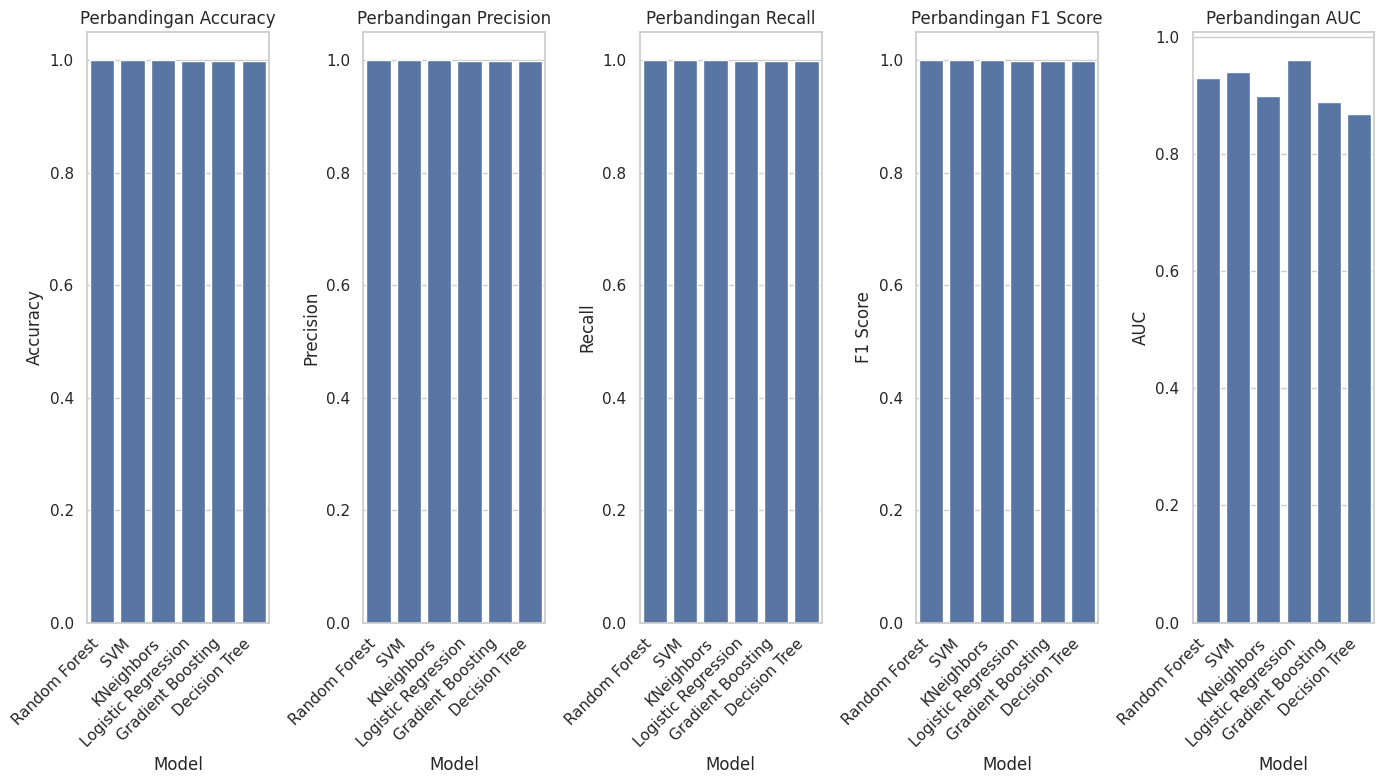

In [ ]:
def create_evaluate_models(X_train, X_test, y_train, y_test, X_train_transformed, X_test_transformed):
    print("\n===== PEMBUATAN DAN EVALUASI MODEL =====")

    # Inisialisasi dictionary untuk menyimpan model dan hasilnya
    models = {}

    # Definisikan model-model yang akan digunakan
    models_to_train = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'KNeighbors': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'SVM': SVC(probability=True, random_state=42)
    }

    # Latih dan evaluasi setiap model
    for name, model in models_to_train.items():
        print(f"\n--------- Model: {name} ---------")

        # Latih model
        print("Melatih model...")
        model.fit(X_train_transformed, y_train)

        # Prediksi pada data testing
        y_pred = model.predict(X_test_transformed)

        # Hitung probabilitas kelas (untuk ROC curve)
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test_transformed)
        else:
            # Untuk SVM yang tidak memiliki predict_proba secara default
            y_proba = model.decision_function(X_test_transformed)
            # Konversi ke format yang mirip dengan predict_proba
            if y_proba.ndim == 1:  # binary classification
                y_proba = np.column_stack([1-y_proba, y_proba])
            else:  # multiclass
                y_proba = np.exp(y_proba) / np.sum(np.exp(y_proba), axis=1)[:, np.newaxis]

        # Hitung metrik evaluasi
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Cetak metrik evaluasi
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")

        # Tampilkan confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Tampilkan classification report
        print(f"\nClassification Report - {name}:")
        print(classification_report(y_test, y_pred))

        # Hitung dan tampilkan ROC Curve dan AUC (untuk kasus biner)
        if len(np.unique(y_test)) == 2:
            # Tampilkan ROC Curve dan hitung AUC
            fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
            auc = roc_auc_score(y_test, y_proba[:, 1])

            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc:.4f})')
            plt.plot([0, 1], [0, 1], color='red', linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {name}')
            plt.legend(loc='lower right')
            plt.show()

            print(f"AUC: {auc:.4f}")

        # Simpan model dan metrik ke dictionary
        models[name] = {
            'model': model,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'predictions': y_pred
        }

        # Jika kasus biner, simpan juga AUC
        if len(np.unique(y_test)) == 2:
            models[name]['auc'] = auc

    # Bandingkan performa model
    print("\n===== PERBANDINGAN PERFORMA MODEL =====")
    comparison = pd.DataFrame({
        'Model': list(models.keys()),
        'Accuracy': [models[m]['accuracy'] for m in models],
        'Precision': [models[m]['precision'] for m in models],
        'Recall': [models[m]['recall'] for m in models],
        'F1 Score': [models[m]['f1'] for m in models]
    })

    # Jika kasus biner, tambahkan kolom AUC
    if len(np.unique(y_test)) == 2:
        comparison['AUC'] = [models[m].get('auc', np.nan) for m in models]

    # Urutkan berdasarkan F1 Score (atau metrik lain yang relevan)
    comparison = comparison.sort_values('F1 Score', ascending=False).reset_index(drop=True)
    print(comparison)

    # Visualisasikan perbandingan model
    plt.figure(figsize=(14, 8))

    # Plot accuracy, precision, recall, f1
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    # Jika kasus biner, tambahkan AUC ke metrics
    if 'AUC' in comparison.columns:
        metrics.append('AUC')

    for i, metric in enumerate(metrics):
        plt.subplot(1, len(metrics), i+1)
        sns.barplot(x='Model', y=metric, data=comparison)
        plt.title(f'Perbandingan {metric}')
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    return models, comparison

# Jalankan pembuatan dan evaluasi model
models, comparison = create_evaluate_models(X_train, X_test, y_train, y_test, X_train_transformed, X_test_transformed)

#5. Analisis Model


===== ANALISIS PERBANDINGAN MODEL =====

Model terbaik berdasarkan F1 Score: Random Forest
Metrik performa: {'model': RandomForestClassifier(random_state=42), 'accuracy': 0.9995065731505305, 'precision': 0.999494853448834, 'recall': 0.9995065731505305, 'f1': 0.999470955988302, 'predictions': array([0, 0, 0, ..., 0, 0, 0]), 'auc': np.float64(0.9292831733355382)}

===== ANALISIS MENDALAM MODEL TERBAIK: Random Forest =====


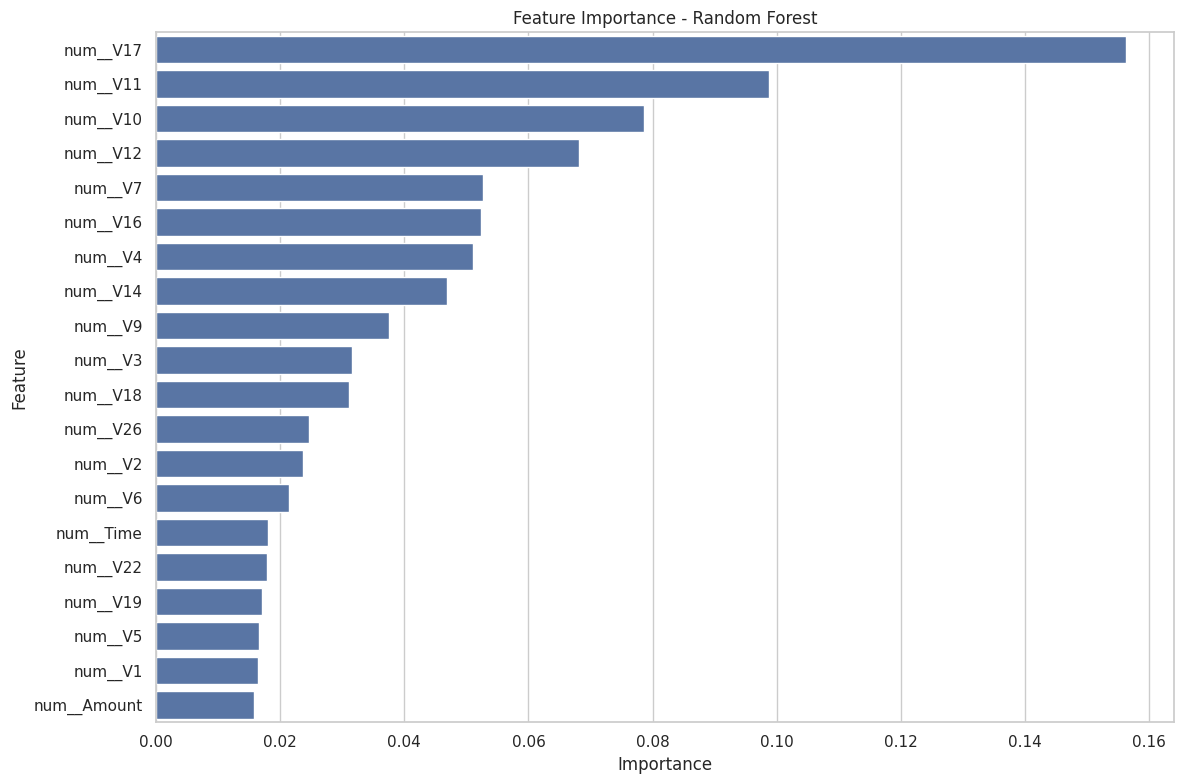


Top 10 fitur paling penting:
     Feature  Importance
17  num__V17    0.156173
11  num__V11    0.098731
10  num__V10    0.078537
12  num__V12    0.068202
7    num__V7    0.052709
16  num__V16    0.052429
4    num__V4    0.051080
14  num__V14    0.046876
9    num__V9    0.037546
3    num__V3    0.031531

Cross-validation untuk model terbaik:
F1 Scores (5-fold CV): [0.99944415 0.99944837 0.99954058 0.99949464 0.99959249]
Rata-rata F1 Score: 0.9995
Standar Deviasi F1 Score: 0.0001

Distribusi kelas pada data training: {0: 0.998334655035686, 1: 0.0016653449643140364}
Rasio imbalance: 599.48

Berdasarkan karakteristik dataset dengan distribusi kelas yang tidak seimbang,
metrik evaluasi yang PALING SESUAI adalah F1 Score dan AUC-ROC:

- F1 Score: Menyeimbangkan precision dan recall, yang penting dalam dataset tidak seimbang.
- AUC-ROC: Mengukur kemampuan model untuk membedakan antar kelas pada berbagai threshold.

Accuracy kurang ideal karena model bisa mendapatkan akurasi tinggi hanya deng

In [ ]:
def analyze_models(comparison, X_train, y_train, X_test, preprocessor):
    print("\n===== ANALISIS PERBANDINGAN MODEL =====")

    # Identifikasi model terbaik berdasarkan F1 Score
    best_model_name = comparison.iloc[0]['Model']
    best_model = models[best_model_name]['model']

    print(f"\nModel terbaik berdasarkan F1 Score: {best_model_name}")
    print(f"Metrik performa: {models[best_model_name]}")

    # Analisis lebih lanjut pada model terbaik
    print(f"\n===== ANALISIS MENDALAM MODEL TERBAIK: {best_model_name} =====")

    # Feature importance jika model mendukungnya
    if hasattr(best_model, 'feature_importances_'):
        # Get feature names
        feature_names = []

        # Extract feature names after preprocessing
        if hasattr(preprocessor, 'get_feature_names_out'):
            try:
                feature_names = preprocessor.get_feature_names_out()
            except:
                # Fallback jika get_feature_names_out tidak berfungsi
                feature_names = [f'feature_{i}' for i in range(len(best_model.feature_importances_))]
        else:
            feature_names = [f'feature_{i}' for i in range(len(best_model.feature_importances_))]

        # Create feature importance dataframe
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': best_model.feature_importances_
        }).sort_values('Importance', ascending=False)

        # Plot feature importance
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))  # Show top 20 features
        plt.title(f'Feature Importance - {best_model_name}')
        plt.tight_layout()
        plt.show()

        print("\nTop 10 fitur paling penting:")
        print(importance_df.head(10))

    # Analisis hyperparameter jika model adalah hasil GridSearchCV
    if hasattr(best_model, 'best_params_'):
        print("\nHyperparameter Optimal:")
        for param, value in best_model.best_params_.items():
            print(f"  • {param}: {value}")

    # Cross-validation untuk menilai stabilitas model terbaik
    print("\nCross-validation untuk model terbaik:")
    cv_scores = cross_val_score(best_model, preprocessor.transform(X_train), y_train, cv=5, scoring='f1_weighted')
    print(f"F1 Scores (5-fold CV): {cv_scores}")
    print(f"Rata-rata F1 Score: {cv_scores.mean():.4f}")
    print(f"Standar Deviasi F1 Score: {cv_scores.std():.4f}")

    # Rekomendasikan metrik yang paling sesuai
    # Analisis kelas target (balanced vs imbalanced)
    class_distribution = y_train.value_counts(normalize=True)
    imbalance_ratio = class_distribution.max() / class_distribution.min()

    print(f"\nDistribusi kelas pada data training: {class_distribution.to_dict()}")
    print(f"Rasio imbalance: {imbalance_ratio:.2f}")

    if imbalance_ratio > 3:
        print("""
Berdasarkan karakteristik dataset dengan distribusi kelas yang tidak seimbang,
metrik evaluasi yang PALING SESUAI adalah F1 Score dan AUC-ROC:

- F1 Score: Menyeimbangkan precision dan recall, yang penting dalam dataset tidak seimbang.
- AUC-ROC: Mengukur kemampuan model untuk membedakan antar kelas pada berbagai threshold.

Accuracy kurang ideal karena model bisa mendapatkan akurasi tinggi hanya dengan memprediksi kelas mayoritas.
""")
    else:
        print("""
Berdasarkan karakteristik dataset dengan distribusi kelas yang relatif seimbang,
semua metrik evaluasi dapat digunakan, namun:

- Accuracy: Memberikan gambaran umum yang baik tentang performa model.
- F1 Score: Masih merupakan metrik yang baik untuk menyeimbangkan precision dan recall.

Pilihan metrik juga bergantung pada konteks bisnis dan konsekuensi dari false positives vs false negatives.
""")

    # Berikan ringkasan akhir
    print("\n===== RINGKASAN AKHIR =====")
    print(f"""
Berdasarkan evaluasi menyeluruh, {best_model_name} merupakan model terbaik untuk kasus klasifikasi ini dengan:
- F1 Score: {models[best_model_name]['f1']:.4f}
- Accuracy: {models[best_model_name]['accuracy']:.4f}
- Precision: {models[best_model_name]['precision']:.4f}
- Recall: {models[best_model_name]['recall']:.4f}
""")

    if 'auc' in models[best_model_name]:
        print(f"- AUC: {models[best_model_name]['auc']:.4f}")

    return best_model_name

# Jalankan analisis model
best_model_name = analyze_models(comparison, X_train, y_train, X_test, preprocessor)



## **Penjelasan Matematis Metrik Evaluasi dan Model Klasifikasi**

### **1. Metrik Evaluasi**

#### **a. Akurasi (Accuracy)**
$$
\text{Akurasi} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$
- **TP**: True Positive, **TN**: True Negative  
- **FP**: False Positive, **FN**: False Negative  
- **Interpretasi**: Proporsi prediksi benar secara keseluruhan.  
- **Kelemahan**: Tidak efektif untuk data tidak seimbang (_imbalanced class_).

#### **b. Presisi (Precision)**
$$
\text{Presisi} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$
- **Interpretasi**: Kemampuan model menghindari prediksi _false positive_.  
- **Prioritas**: Penting jika biaya **FP** tinggi (e.g., diagnosis penyakit).

#### **c. Recall (Sensitivity)**
$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$
- **Interpretasi**: Kemampuan model mendeteksi semua _positive case_.  
- **Prioritas**: Penting jika biaya **FN** tinggi (e.g., deteksi fraud).

#### **d. F1-Score**
$$
F1 = 2 \times \frac{\text{Presisi} \times \text{Recall}}{\text{Presisi} + \text{Recall}}
$$
- **Interpretasi**: Rata-rata harmonik presisi dan recall.  
- **Kegunaan**: Optimal untuk data tidak seimbang.

#### **e. AUC-ROC**
- **ROC Curve**: Kurva _True Positive Rate_ (TPR) vs _False Positive Rate_ (FPR) dengan variasi threshold klasifikasi.  
- **AUC**: Area di bawah kurva ROC.  
$$
\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}, \quad \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
$$
- **Interpretasi**: AUC = 1 (sempurna), AUC = 0.5 (random guess).  
- **Kegunaan**: Mengevaluasi performa model secara holistik pada semua threshold.

---

### **2. Model Klasifikasi (Formulasi Matematis)**

#### **a. Logistic Regression**
$$
P(y=1 | \mathbf{x}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p)}}
$$
- **Optimisasi**: Minimalkan _log-loss_ via _Maximum Likelihood Estimation_ (MLE):  
$$
\mathcal{L}(\beta) = -\sum_{i=1}^n \left[ y_i \log(p_i) + (1-y_i) \log(1-p_i) \right]
$$

#### **b. Decision Tree**
- **Kriteria Split** (Entropi):  
$$
\text{Entropi}(S) = -\sum_{c \in C} p_c \log_2 p_c
$$
- **Kriteria Split** (Gini Impurity):  
$$
\text{Gini}(S) = 1 - \sum_{c \in C} p_c^2
$$
- **Interpretasi**: Memilih split yang memaksimalkan reduksi ketidakmurnian.

#### **c. K-Nearest Neighbors (KNN)**
$$
\hat{y}(x) = \text{mode}\left( \{ y_i | x_i \in \mathcal{N}_k(x) \} \right)
$$
- $\mathcal{N}_k(x)$: Himpunan $k$ tetangga terdekat dari $x$.  
- **Distance Metric**: Biasanya Euclidean:  
$$
d(x, x') = \sqrt{\sum_{i=1}^p (x_i - x'_i)^2}
$$

#### **d. Random Forest (Bagging)**
- **Ensemble** dari \(B\) decision tree.  
- **Prediksi Final**:  
$$
\hat{y}_{\text{RF}} = \text{mode}\left( \{ \hat{y}_1(x), \hat{y}_2(x), ..., \hat{y}_B(x) \} \right)
$$
- **Diversifikasi**: Setiap tree dilatih pada _bootstrap sample_ dan subset fitur.

#### **e. Gradient Boosting**
- **Model Aditif**:  
$$
F_m(x) = F_{m-1}(x) + \gamma h_m(x)
$$
- **Loss Function** (e.g., log-loss):  
$$
\mathcal{L}(y, F(x)) = \sum_{i=1}^n \left[ -y_i \log(p_i) - (1-y_i) \log(1-p_i) \right]
$$
- **Optimisasi**: $h_m(x)$ dilatih untuk mengoreksi residual $y - F_{m-1}(x)$.

#### **f. Support Vector Machine (SVM)**
- **Optimisasi** (Hyperplane Pemisah):  
$$
\begin{align*}
\min_{\mathbf{w}, b} & \quad \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \xi_i \\
\text{s.t.} & \quad y_i(\mathbf{w}^T \phi(\mathbf{x}_i) + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
\end{align*}
$$
- **Kernel Trick**: $\phi(\mathbf{x})$ memetakan data ke ruang dimensi tinggi (e.g., RBF kernel: $\phi(\mathbf{x}, \mathbf{x}') = e^{-\gamma \|\mathbf{x} - \mathbf{x}'\|^2}$.


